In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import datetime
import pandas as pd
import sys
import numpy as np
import networkx as nx
sys.path.append("..")
import temporal_graph

## Datos desde csv

Posiblemente puede resultar útil interpretar información desde archivo csv para crear el grafo temporal.

In [3]:
mails_chain = pd.read_csv('../data/mails.csv', encoding='latin1')
labels = ['tipo A', 'tipo B', 'tipo C']
mails_chain['label'] = [labels[np.random.randint(3)] for _ in range(mails_chain.shape[0])]
mails_chain.tail()

,origen,destino,fecha,label
52,Margarita,Emilia,3/04/2018,tipo C
53,Luciano,Zoe,4/04/2018,tipo C
54,Dana,Martina,5/04/2018,tipo B
55,Imanol,Nicolás,5/04/2018,tipo A
56,Denise,Pedro,6/04/2018,tipo C


Positions 94 nodes


C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


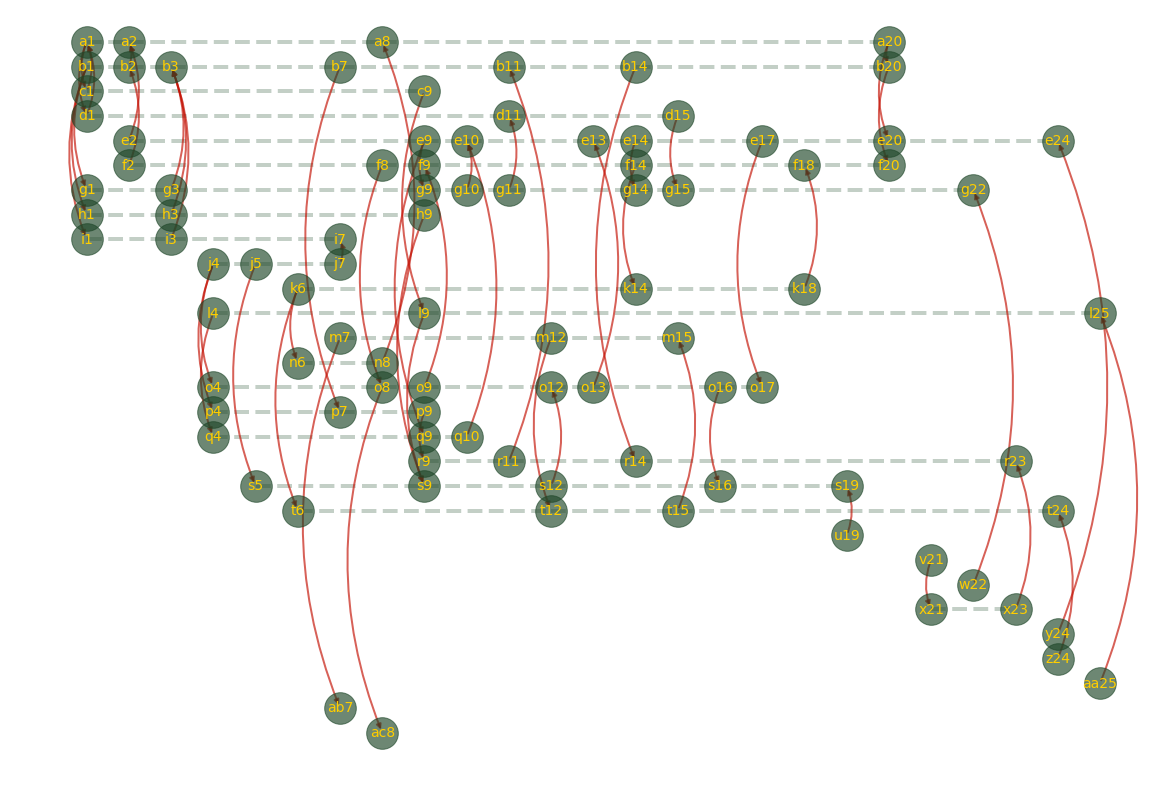

In [4]:
# FORMATO_FECHA = '%d/%m/%Y'
tg = temporal_graph.TemporalGraph(
    pd.to_datetime(mails_chain.fecha,
                   format=temporal_graph.FORMATO_FECHA))
tg.clean_and_build_links_data(
    mails_chain,
    'origen',
    'destino',
    'fecha',
    col_label='label',
    verbose=False)
tg.plot()

Empezamos explorando la api para ver que nos ofrece para caminos:

In [5]:
grafo = tg.get_graph()
paths = nx.all_simple_paths(grafo, source='a1', target='g15')

[print(path) for path in paths]

['a1', 'c1', 'c9', 'l9', 's9', 's12', 'o12', 'o13', 'e13', 'e14', 'g14', 'g15']
['a1', 'd1', 'd11', 'd15', 'g15']


[None, None]

Podemos darle un máximo de nodos:

In [6]:
paths = nx.all_simple_paths(grafo, source='a1', target='g15', cutoff=6)

[print(path) for path in paths]

['a1', 'd1', 'd11', 'd15', 'g15']


[None]

In [7]:
paths = nx.all_simple_paths(grafo, source='a1', target='o17')
[print(path) for path in paths]

['a1', 'c1', 'c9', 'l9', 's9', 's12', 'o12', 'o13', 'e13', 'e14', 'e17', 'o17']
['a1', 'c1', 'c9', 'l9', 's9', 's12', 'o12', 'o13', 'o16', 'o17']


[None, None]

In [8]:
paths = nx.all_simple_paths(grafo, source='a1', target='o17')
max(paths, key=len)

['a1', 'c1', 'c9', 'l9', 's9', 's12', 'o12', 'o13', 'e13', 'e14', 'e17', 'o17']

In [9]:
paths = nx.all_simple_paths(grafo, source='a1', target='o17')
min(paths, key=len)

['a1', 'c1', 'c9', 'l9', 's9', 's12', 'o12', 'o13', 'o16', 'o17']

##### Todos los caminos cortos:

In [10]:
print([path for path in nx.all_shortest_paths(grafo, source='a1',target='o17')])

[['a1', 'c1', 'c9', 'l9', 's9', 's12', 'o12', 'o13', 'o16', 'o17']]


In [11]:
print([path for path in nx.all_shortest_paths(grafo, source='k6',target='a20')])

[['k6', 'n6', 'n8', 'a8', 'a20']]


> all_shortest_paths(G, source, target, weight=None):

> weight : None or string, optional (default = None): If None, every edge has weight/distance/cost 1. If a string, use this edge attribute as the edge weight. Any edge attribute not present defaults to 1.

In [12]:
try:
    print([path for path in nx.all_shortest_paths(grafo, source='a1',target='u19')])
except nx.NetworkXNoPath:
    print('no hay camino...')

no hay camino...


In [13]:
tg.temporal_proximity_table()

,a,aa,ab,ac,b,c,d,e,f,g,...,r,s,t,u,v,w,x,y,z,Pout
a,0.0,NaN,NaN,NaN,1.123200e+06,0.0,0.0,950400.0,1.123200e+06,1.123200e+06,...,NaN,691200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,739200
aa,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
ab,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
ac,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
b,43200.0,NaN,NaN,NaN,0.000000e+00,NaN,864000.0,1209600.0,1.086171e+06,0.000000e+00,...,374400.0,691200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,503906
c,0.0,NaN,NaN,NaN,1.728000e+06,0.0,0.0,691200.0,1.728000e+06,7.776000e+05,...,NaN,345600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,691200
d,0.0,NaN,NaN,NaN,1.728000e+06,0.0,0.0,1036800.0,1.728000e+06,4.896000e+05,...,NaN,691200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,812800
e,0.0,NaN,NaN,NaN,1.641600e+06,NaN,475200.0,0.0,1.641600e+06,2.073600e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,685851
f,0.0,NaN,NaN,259200.0,0.000000e+00,NaN,NaN,691200.0,0.000000e+00,7.776000e+05,...,604800.0,950400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,447120
g,NaN,NaN,NaN,NaN,8.640000e+04,NaN,362880.0,367200.0,1.641600e+06,0.000000e+00,...,604800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,638126


In [14]:
tg.geodesic_proximity('a','b', 1, None, verbose=True)

g(A,D,tX,null): Searching path from a1 to b20
From a1 to b20
Path found: ['a1', 'a2', 'a8', 'a20', 'b20']


4

In [15]:
tg.geodesic_proximity('a','g', None, 22, verbose=True)

Searching path from a1 to g22
Path found: ['a1', 'd1', 'd11', 'd15', 'g15', 'g22']


5

In [16]:
tg.geodesic_proximity('a','f', 1, 20, verbose=True)

Searching path from a1 to f20
Path found: ['a1', 'a2', 'a8', 'a20', 'b20', 'f20']


5

In [17]:
tg.geodesic_proximity('a','f', None, None, verbose=True)

g(A,D,null,null)
From a1 to f20
Path found: ['a1', 'a2', 'a8', 'a20', 'b20', 'f20']
From a2 to f20
Path found: ['a2', 'a8', 'a20', 'b20', 'f20']
From a8 to f20
Path found: ['a8', 'a20', 'b20', 'f20']
From a20 to f20
Path found: ['a20', 'b20', 'f20']


2

Test con la data del ejemplo:

Enlace:  A B 2018-12-31 00:00:00 A1
Enlace:  A C 2019-01-01 00:00:00 A2
Enlace:  A E 2019-01-01 00:00:00 A2
Enlace:  E D 2019-01-03 00:00:00 E3
Enlace:  B C 2019-01-05 00:00:00 B4
Enlace:  B D 2019-01-09 00:00:00 B5
Enlace:  D B 2019-01-14 00:00:00 D6
Enlace:  A D 2019-01-20 00:00:00 A7
Positions 15 nodes


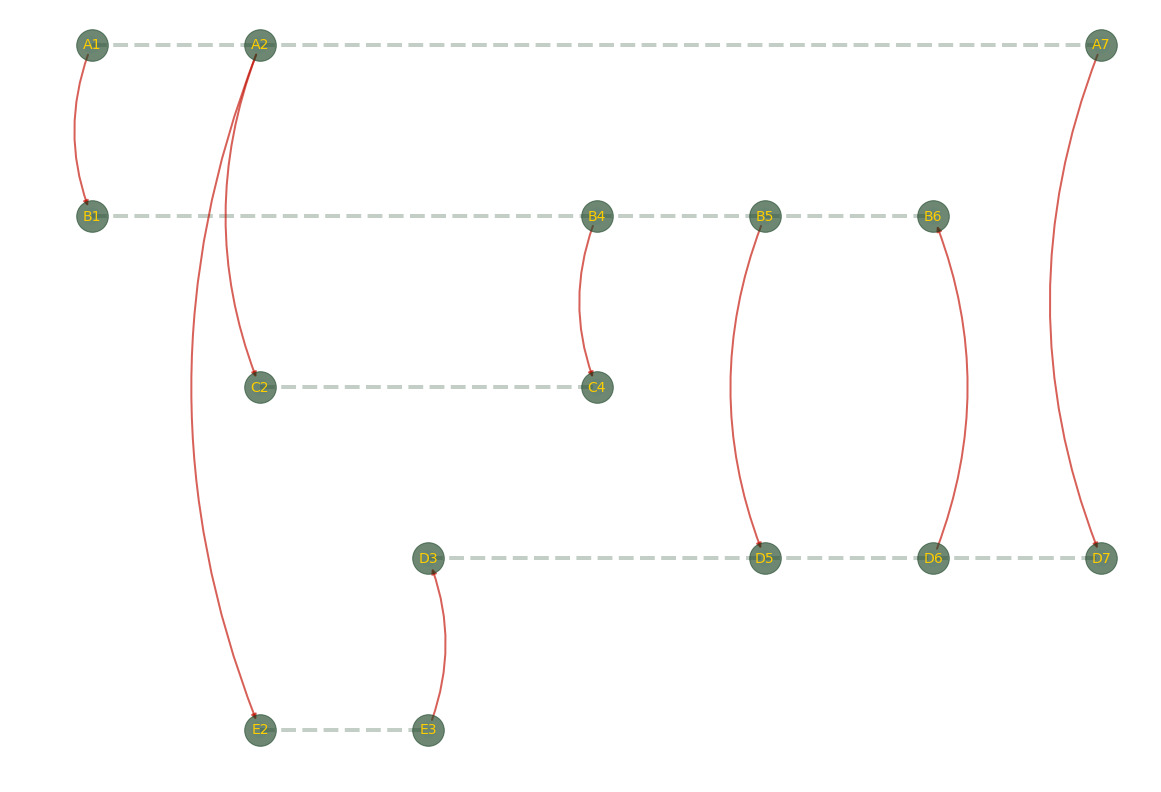

In [18]:
tgK = temporal_graph.get_temporal_graph_kostakos()
tgK.plot()

In [19]:
graphK = tgK.get_graph()

#### Testear casos A, B y C:

In [20]:
tgK.geodesic_proximity('A', 'D', 1, None, verbose=True)

g(A,D,tX,null): Searching path from A1 to D7
From A1 to D3
Path found: ['A1', 'A2', 'E2', 'E3', 'D3']
From A1 to D5
Path found: ['A1', 'B1', 'B4', 'B5', 'D5']
From A1 to D6
Path found: ['A1', 'B1', 'B4', 'B5', 'D5', 'D6']
From A1 to D7
Path found: ['A1', 'A2', 'A7', 'D7']


3

In [21]:
tgK.geodesic_proximity('A', 'D', None, 5, verbose=True)

Searching path from A1 to D5
Path found: ['A1', 'B1', 'B4', 'B5', 'D5']


4

In [22]:
tgK.geodesic_proximity('A', 'D', 2, 7, verbose=True)

Searching path from A2 to D7
Path found: ['A2', 'A7', 'D7']


2

In [23]:
tgK.geodesic_proximity('A', 'D', None, 4, verbose=True)

Searching path from A1 to D3
Path found: ['A1', 'A2', 'E2', 'E3', 'D3']


4

#### Testear casos D (null, null):

In [24]:
tgK.geodesic_proximity('A', 'D', None, None, verbose=True)

g(A,D,null,null)
From A1 to D3
Path found: ['A1', 'A2', 'E2', 'E3', 'D3']
From A1 to D5
Path found: ['A1', 'B1', 'B4', 'B5', 'D5']
From A1 to D6
Path found: ['A1', 'B1', 'B4', 'B5', 'D5', 'D6']
From A1 to D7
Path found: ['A1', 'A2', 'A7', 'D7']
From A2 to D3
Path found: ['A2', 'E2', 'E3', 'D3']
From A2 to D5
Path found: ['A2', 'E2', 'E3', 'D3', 'D5']
From A2 to D6
Path found: ['A2', 'E2', 'E3', 'D3', 'D5', 'D6']
From A2 to D7
Path found: ['A2', 'A7', 'D7']
From A7 to D7
Path found: ['A7', 'D7']


1

In [25]:
tgK.geodesic_proximity('A','A', 1, 7, verbose=True)

Searching path from A1 to A7
Path found: ['A1', 'A2', 'A7']


2

In [29]:
tgK.average_geodesic_proximity('A', 'D')

From A to D at time:1, geodesic: 3
From A to D at time:2, geodesic: 2
From A to D at time:7, geodesic: 1


2.0

In [31]:
tgK.average_geodesic_proximity('A', 'B', verbose=True)

>> geodesic_proximity:
g(A,D,tX,null): Searching path from A1 to B1
>> geodesic_proximity:
From A1 to B1
Path found: ['A1', 'B1']
>> geodesic_proximity:
g(A,D,tX,null): Searching path from A1 to B4
>> geodesic_proximity:
From A1 to B4
Path found: ['A1', 'B1', 'B4']
>> geodesic_proximity:
g(A,D,tX,null): Searching path from A1 to B5
>> geodesic_proximity:
From A1 to B5
Path found: ['A1', 'B1', 'B4', 'B5']
>> geodesic_proximity:
g(A,D,tX,null): Searching path from A1 to B6
>> geodesic_proximity:
From A1 to B6
Path found: ['A1', 'B1', 'B4', 'B5', 'B6']
>> average_geodesic_proximity:
From A to B at time:1, geodesic: 1
>> geodesic_proximity:
g(A,D,tX,null): Searching path from A2 to B4
>> geodesic_proximity:
g(A,D,tX,null): Searching path from A2 to B5
>> geodesic_proximity:
g(A,D,tX,null): Searching path from A2 to B6
>> geodesic_proximity:
From A2 to B6
Path found: ['A2', 'E2', 'E3', 'D3', 'D5', 'D6', 'B6']
>> average_geodesic_proximity:
From A to B at time:2, geodesic: 6


3.5

In [32]:
tgK.average_geodesic_proximity('A', 'A', verbose=True)

0

In [33]:
tgK.average_geodesic_proximity('B', 'D')

>> average_geodesic_proximity:
From B to D at time:1, geodesic: 3
>> average_geodesic_proximity:
From B to D at time:4, geodesic: 2
>> average_geodesic_proximity:
From B to D at time:5, geodesic: 1


2.0

In [34]:
tgK.average_geodesic_proximity('B', 'E')

In [35]:
tgK.average_geodesic_proximity_to_node('A')

{'A': 0, 'B': None, 'C': None, 'D': None, 'E': None}

In [36]:
tgK.average_geodesic_proximity_from_node('A')

>> average_geodesic_proximity:
From A to B at time:1, geodesic: 1
>> average_geodesic_proximity:
From A to B at time:2, geodesic: 6
>> average_geodesic_proximity:
From A to C at time:1, geodesic: 2
>> average_geodesic_proximity:
From A to C at time:2, geodesic: 1
>> average_geodesic_proximity:
From A to D at time:1, geodesic: 3
>> average_geodesic_proximity:
From A to D at time:2, geodesic: 2
>> average_geodesic_proximity:
From A to D at time:7, geodesic: 1
>> average_geodesic_proximity:
From A to E at time:1, geodesic: 2
>> average_geodesic_proximity:
From A to E at time:2, geodesic: 1


{'A': 0, 'B': 3.5, 'C': 1.5, 'D': 2.0, 'E': 1.5}

In [37]:
tgK.average_geodesic_proximity_to_node('A', G_in=True)

{'A': 0, 'B': None, 'C': None, 'D': None, 'E': None, 'Gin': None}

In [38]:
tgK.average_geodesic_proximity_to_node('B', G_in=True)

>> average_geodesic_proximity:
From A to B at time:1, geodesic: 1
>> average_geodesic_proximity:
From A to B at time:2, geodesic: 6
>> average_geodesic_proximity:
From D to B at time:3, geodesic: 3
>> average_geodesic_proximity:
From D to B at time:5, geodesic: 2
>> average_geodesic_proximity:
From D to B at time:6, geodesic: 1
>> average_geodesic_proximity:
From E to B at time:2, geodesic: 5
>> average_geodesic_proximity:
From E to B at time:3, geodesic: 4


{'A': 3.5, 'B': 0, 'C': None, 'D': 2.0, 'E': 4.5, 'Gin': 3.3333333333333335}

In [39]:
tgK.average_geodesic_proximity_from_node('A', G_out=True)

>> average_geodesic_proximity:
From A to B at time:1, geodesic: 1
>> average_geodesic_proximity:
From A to B at time:2, geodesic: 6
>> average_geodesic_proximity:
From A to C at time:1, geodesic: 2
>> average_geodesic_proximity:
From A to C at time:2, geodesic: 1
>> average_geodesic_proximity:
From A to D at time:1, geodesic: 3
>> average_geodesic_proximity:
From A to D at time:2, geodesic: 2
>> average_geodesic_proximity:
From A to D at time:7, geodesic: 1
>> average_geodesic_proximity:
From A to E at time:1, geodesic: 2
>> average_geodesic_proximity:
From A to E at time:2, geodesic: 1


{'A': 0, 'B': 3.5, 'C': 1.5, 'D': 2.0, 'E': 1.5, 'Gout': 2.125}

In [40]:
tgK.average_geodesic_proximity_from_node('C', G_out=True)

{'A': None, 'B': None, 'C': 0, 'D': None, 'E': None, 'Gout': None}

In [41]:
tgK.average_geodesic_proximity_from_node('E', G_out=True)

>> average_geodesic_proximity:
From E to B at time:2, geodesic: 5
>> average_geodesic_proximity:
From E to B at time:3, geodesic: 4
>> average_geodesic_proximity:
From E to D at time:2, geodesic: 2
>> average_geodesic_proximity:
From E to D at time:3, geodesic: 1


{'A': None, 'B': 4.5, 'C': None, 'D': 1.5, 'E': 0, 'Gout': 3.0}

In [42]:
tgK.average_geodesic_proximity_from_node('D', G_out=True)

>> average_geodesic_proximity:
From D to B at time:3, geodesic: 3
>> average_geodesic_proximity:
From D to B at time:5, geodesic: 2
>> average_geodesic_proximity:
From D to B at time:6, geodesic: 1


{'A': None, 'B': 2.0, 'C': None, 'D': 0, 'E': None, 'Gout': 2.0}

In [43]:
tgK.average_geodesic_reach('D')

>> average_geodesic_proximity:
From D to B at time:3, geodesic: 3
>> average_geodesic_proximity:
From D to B at time:5, geodesic: 2
>> average_geodesic_proximity:
From D to B at time:6, geodesic: 1


2.0

In [44]:
tgK.temporal_geodesic_table(formatear=temporal_graph.formatear)

{'A': 0, 'B': None, 'C': None, 'D': None, 'E': None, 'Gin': None}
>> average_geodesic_proximity:
From A to B at time:1, geodesic: 1
>> average_geodesic_proximity:
From A to B at time:2, geodesic: 6
>> average_geodesic_proximity:
From A to C at time:1, geodesic: 2
>> average_geodesic_proximity:
From A to C at time:2, geodesic: 1
>> average_geodesic_proximity:
From A to D at time:1, geodesic: 3
>> average_geodesic_proximity:
From A to D at time:2, geodesic: 2
>> average_geodesic_proximity:
From A to D at time:7, geodesic: 1
>> average_geodesic_proximity:
From A to E at time:1, geodesic: 2
>> average_geodesic_proximity:
From A to E at time:2, geodesic: 1
>> average_geodesic_proximity:
From A to B at time:1, geodesic: 1
>> average_geodesic_proximity:
From A to B at time:2, geodesic: 6
>> average_geodesic_proximity:
From D to B at time:3, geodesic: 3
>> average_geodesic_proximity:
From D to B at time:5, geodesic: 2
>> average_geodesic_proximity:
From D to B at time:6, geodesic: 1
>> average

,A,B,C,D,E,Gout
A,0.00,3.50,1.50,2.00,1.50,2.12
B,-,0.00,1.50,2.00,-,1.75
C,-,-,0.00,-,-,-
D,-,2.00,-,0.00,-,2.00
E,-,4.50,-,1.50,0.00,3.00
Gin,-,3.33,1.50,1.83,1.50,-


In [45]:
tgK.average_geodesic_proximity_to_node('D', G_in=True)

>> average_geodesic_proximity:
From A to D at time:1, geodesic: 3
>> average_geodesic_proximity:
From A to D at time:2, geodesic: 2
>> average_geodesic_proximity:
From A to D at time:7, geodesic: 1
>> average_geodesic_proximity:
From B to D at time:1, geodesic: 3
>> average_geodesic_proximity:
From B to D at time:4, geodesic: 2
>> average_geodesic_proximity:
From B to D at time:5, geodesic: 1
>> average_geodesic_proximity:
From E to D at time:2, geodesic: 2
>> average_geodesic_proximity:
From E to D at time:3, geodesic: 1


{'A': 2.0, 'B': 2.0, 'C': None, 'D': 0, 'E': 1.5, 'Gin': 1.8333333333333333}

In [55]:
tgK.temporal_geodesic_table(formatear=temporal_graph.formatear, verbose=True)

>> temporal_geodesic_table:
	A: {'A': 0, 'B': None, 'C': None, 'D': None, 'E': None, 'Gin': None}
>> temporal_geodesic_table:
	B: {'A': 3.5, 'B': 0, 'C': None, 'D': 2.0, 'E': 4.5, 'Gin': 3.3333333333333335}
>> temporal_geodesic_table:
	C: {'A': 1.5, 'B': 1.5, 'C': 0, 'D': None, 'E': None, 'Gin': 1.5}
>> temporal_geodesic_table:
	D: {'A': 2.0, 'B': 2.0, 'C': None, 'D': 0, 'E': 1.5, 'Gin': 1.8333333333333333}
>> temporal_geodesic_table:
	E: {'A': 1.5, 'B': None, 'C': None, 'D': None, 'E': 0, 'Gin': 1.5}


,A,B,C,D,E,Gout
A,0.00,3.50,1.50,2.00,1.50,2.12
B,-,0.00,1.50,2.00,-,1.75
C,-,-,0.00,-,-,-
D,-,2.00,-,0.00,-,2.00
E,-,4.50,-,1.50,0.00,3.00
Gin,-,3.33,1.50,1.83,1.50,-


In [57]:
avg_geodistances = tgK.temporal_geodesic_table()

In [58]:
avg_geodistances.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, A to Gin
Data columns (total 6 columns):
A       1 non-null float64
B       5 non-null float64
C       4 non-null float64
D       5 non-null float64
E       3 non-null float64
Gout    5 non-null object
dtypes: float64(5), object(1)
memory usage: 336.0+ bytes
